In [1]:
from LowPrecisionApproxGP.model.inducing_point_kernel import VarPrecisionInducingPointKernel
import gpytorch
# from gpytorch.kernels.inducing_point_kernel import InducingPointKernel
import torch
from LowPrecisionApproxGP.util.GreedyTrain import greedy_train

In [2]:
# Define Model
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood, dtype):
        self._dtype_to_set = dtype
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = VarPrecisionInducingPointKernel(
            gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()), inducing_points=torch.empty(1), likelihood=likelihood, dtype=self._dtype_to_set)

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)



In [3]:
import math
# Create / Reshape Data
train_x = torch.linspace(0, 1, 100).reshape(-1,1)
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)
train_y = train_y.reshape(-1,1)

# Set up inducing point variables
inducing_point_candidates = train_x.detach().clone()
training_iter = 1000
max_inducing_points = 1000

In [6]:
dtype = torch.float32
# Create Likelihood / Model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood, dtype)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood,model)

# Set to training mode
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters
# Train Model
model = greedy_train((train_x,train_y), model, mll,max_inducing_points,training_iter,dtype=dtype,Use_Max=True,J=20,max_Js=10)

tensor(-77.9835)
tensor(-75.0904)
tensor(-75.0904)
tensor(-75.0023)
tensor(-75.0023)
tensor(-75.0023)
tensor(-75.0023)
tensor(-75.0023)
tensor(-75.0023)
tensor(-75.0023)
tensor(-75.0023)
tensor(-75.0023)
tensor(-75.0023)
tensor(-74.8748)
tensor(-74.7962)
tensor(-74.7962)
tensor(-74.7962)
tensor(-74.7962)
tensor(-74.7962)
tensor(-74.7962)
tensor(-70.6716)
tensor(-70.6551)
tensor(-70.6551)
tensor(-70.6429)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-70.6424)
tensor(-66.8670)
tensor(-66.8669)
tensor(-66.8668)
tensor(-66.8668)
tensor(-66.8666)
tensor(-66.8666)
tensor(-66.8666)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.8665)
tensor(-66.866

/opt/homebrew/anaconda3/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


tensor(-51.0052)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-51.0050)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8537)
tensor(-46.8536)
tensor(-46.8536)
tensor(-46.8536)
tensor(-46.8536)
tensor(-46.8536)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.6297)
tensor(-42.629

In [7]:
model.covar_module.inducing_points.dtype

torch.float32

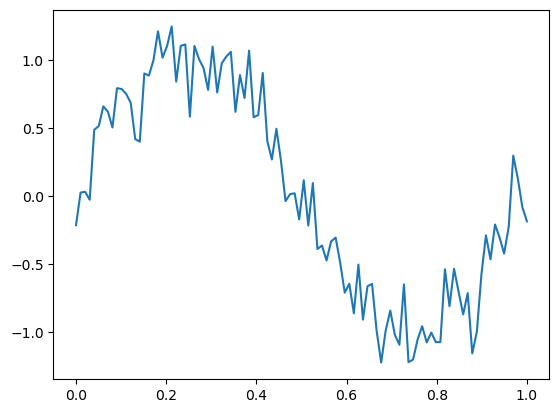

In [8]:
import matplotlib.pyplot as plt

plt.plot(train_x.numpy(),train_y.numpy())

In [5]:
torch.cuda.is_available()

False